<a href="https://colab.research.google.com/github/SeekingNirvaana/BCG-Data-Science-Advanced-Analytics-/blob/main/EDA_Cleaning_BCG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="center">
<img src="https://raw.githubusercontent.com/srgarcess/BCG/main/assets/BCG_MONOGRAM.png" alt = "BCG  icon" width="50%" height="80%">
</p>
<br><br>

# **Exploratory Data Analysis and Cleaning**
By [Anoop Keshari](https://github.com/SeekingNirvaana)









## **The Datasets**

The dataset `output.csv` named as `pco_output` contains:
> * `id`: contact id
*`churn`: has the client churned over the next 3 months


The dataset `price_data(1).csv` named as `pco_hist` contains the history of energy and power consumption per client:
>* `id`: contact id
*`price_date`: reference date
*`price_p1_var`: price of energy for the 1st period
*`price_p2_var`: price of energy for the 2nd period
*`price_p3_var`: price of energy for the 3rd period
*`price_p1_fix`: price of power for the 1st period
*`price_p2_fix`: price of power for the 2nd period
*`price_p3_fix`: price of power for the 3rd period


The dataset `client_data(1).csv` contains:
>* `id`: contact id
* `activity_new`: category of the company's activity. 419 unique values, remove `NaN`
* `campaign_disc_elec`: code of the electricity campaign the customer last subscribed to. 0 non-null
* `channel_sales`: code of the sales channel
* `cons_12m`: electricity consumption of the past 12 months
* `cons_gas_12m`: gas consumption of the past 12 months
* `cons_last_month`: electricity consupmtion of the last month
* `date_activ`: date of activation of the contract
* `date_end`: registered date of the end of the contract
* `date_first_activ`: date of first contract of the client
* `date_modif_prod`: date of last modification of the product
*  `date_renewal`: date of the next contract renewal
* `forecast_base_bill_ele`: forecasted electricity bill baseline for next month
* `forecast_base_bill_year`: forecasted electricity bill baseline for calendar year
* `forecast_bill_12m`: forecasted electricity bill baseline for 12 months
* `forecast_cons`: forecasted electricity consumption for next month
* `forecast_cons_12m`: forecasted electricity consumption for next 12 months
* `forecast_cons_year`: forecasted electricity consumption for next calendar year
* `forecast_discount_energy`: forecasted value of current discount
* `forecast_meter_rent_12m`: forecasted bill of meter rental for the next 12 months
* `forecast_price_energy_p1`: forecasted energy price for 1st period
* `forecast_price_energy_p2`: forecasted energy price for 2nd period
* `forecast_price_pow_p1`: forecasted power price for 1st period
* `has_gas`: indicated if client is also a gas client
* `imp_cons`: current paid consumption
* `margin_gross_pow_ele`: gross margin on power subscription
* `margin_net_pow_ele`: net margin on power subscription
* `nb_prod_act`: number of active products and services
* `net_margin`: total net margin
* `num_years_antig`: antiquity of the client (in number of years)
* `origin_up`: code of the electricity campaign the customer first subscribed to
* `pow_max`: subscribed power

## **Importing Libraries and Datasets**

In this section we import the libraries of interest as well as the datasets.

In [56]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno
from scipy.stats import zscore as zscore

In [57]:
# Read in dataset
url = 'https://raw.githubusercontent.com/SeekingNirvaana/BCG-Data-Science-Advanced-Analytics-/main/.github/workflows/client_data(1).csv'
url2 = 'https://raw.githubusercontent.com/SeekingNirvaana/BCG-Data-Science-Advanced-Analytics-/main/.github/workflows/price_data(1).csv'
url3 = 'https://raw.githubusercontent.com/SeekingNirvaana/BCG-Data-Science-Advanced-Analytics-/main/.github/workflows/output.csv'



In [58]:
# list of dates
dt_lst = ['date_activ','date_end','date_modif_prod','date_renewal']

# data importing          
pco_main = pd.read_csv(url)
pco_hist = pd.read_csv(url2) # Yearly history of consumption per user
pco_output = pd.read_csv(url3)
pd.set_option('display.max_columns',None)



## Checking the Column Names in all the Data Frames.

In [59]:
pco_main.columns

Index(['id', 'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'date_activ', 'date_end', 'date_modif_prod', 'date_renewal',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'churn'],
      dtype='object')

In [60]:
pco_hist.columns

Index(['id', 'price_date', 'price_off_peak_var', 'price_peak_var',
       'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix',
       'price_mid_peak_fix'],
      dtype='object')

#**Data Exploration**

## **The Output Dataset**

From the output dataset we can derive a quick insight on customer retention. 

In [61]:
# Replace the churn column with appropiate labels
pco_output['churn'] = pco_output['churn'].replace({0:'Stayed',1:'Churned'})

# Glimpse
pco_output.head()

,id,churn
0,48ada52261e7cf58715202705a0451c9,Stayed
1,24011ae4ebbe3035111d65fa7c15bc57,Churned
2,d29c2c54acc38ff3c0614d0a653813dd,Stayed
3,764c75f661154dac3a6c254cd082ea7d,Stayed
4,bba03439a292a1e166f80264c16191cb,Stayed


In [62]:
# What number of customers have churned in the last 3 months?
attrition_count = pco_output['churn'].value_counts()
print('Total Number of Churned Customers:\n', attrition_count)

Total Number of Churned Customers:
 Stayed     14501
Churned     1595
Name: churn, dtype: int64


In [63]:
# What is the proportion of customer attrition in the last 3 months?
attrition_rate = pco_output['churn'].value_counts() / pco_output.shape[0] * 100
print('Attrition rate: \n', attrition_rate)

Attrition rate: 
 Stayed     90.090706
Churned     9.909294
Name: churn, dtype: float64


---
###**Facts**
> * In the last 3 months 1,595 customers have churned
* There are currently 14,501 active clients
* Customer retention is 90% in the last 3 months 
* Customer attrition is 10% in the last 3 months

---
###**Observations**
* Dataset has complete cases


## **The History Dataset**

This dataset contains 1-year historical data for each client. It provides insights of the yearly activity of each client. 

In [64]:
# Display the yearly consumption of energy and power of customers
pco_hist.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [65]:
# Examing the structure of the dataframe
pco_hist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [66]:
# Examine the descriptive statistics of the dataframe
pco_hist.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


In [67]:
# Identify the nullity of the dataframe
missing_values_hist = pco_hist.isna().sum()
print('Total Missing Values:\n', missing_values_hist)

Total Missing Values:
 id                    0
price_date            0
price_off_peak_var    0
price_peak_var        0
price_mid_peak_var    0
price_off_peak_fix    0
price_peak_fix        0
price_mid_peak_fix    0
dtype: int64


In [68]:
# Identify the percentage of nullity in the dataframe for each collumn
missing_values_hist_perc = pco_hist.isnull().mean() * 100
print('Percentage of Missing Values:\n', missing_values_hist_perc)

Percentage of Missing Values:
 id                    0.0
price_date            0.0
price_off_peak_var    0.0
price_peak_var        0.0
price_mid_peak_var    0.0
price_off_peak_fix    0.0
price_peak_fix        0.0
price_mid_peak_fix    0.0
dtype: float64


---
###**Facts**

* The average price of energy for the 1st period was: $0.14
* The average price of energy for the 2nd period was: \$0.05
* The average price of energy for the 3rd period was: \$0.03

*The average price of energy was declining in the last year*.

* The average power of power for the 1st period was: \$43.32
* The average power of power for the 2nd period was: \$10.69
* The average power of power for the 3rd period was: \$6.45

*The average price of power was declining in the last year*.











---
###**Observations**
* The columns `price_p1_fix`, `price_p2_fix`, and `price_p3_fix` contain negative values. *These negative prices of power do not make sense.* 

* The dataset `pco_hist` contains 1359 rows displaying `NaN` values on 6 variables except for `id` and `price_date`.

* The `price_..._var` and `price_..._fix` columns are missing **0.704%** of the data in each of them.



*Notice how the price of energy has a minimum value of zero. Perhaps some customers churned thereby making the consumption of energy zero.*

---

##**The Main Dataset**

This dataset contain more characteristics about each client's account and activity.

In [69]:
# Print header
pco_main.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [70]:
# printo info
pco_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [71]:
# Identify the percentage of nullity in the dataframe for each collumn
missing_values_main_perc = pco_main.isnull().mean() * 100
print('Percentage of Missing Values:\n', missing_values_main_perc)

Percentage of Missing Values:
 id                                0.0
channel_sales                     0.0
cons_12m                          0.0
cons_gas_12m                      0.0
cons_last_month                   0.0
date_activ                        0.0
date_end                          0.0
date_modif_prod                   0.0
date_renewal                      0.0
forecast_cons_12m                 0.0
forecast_cons_year                0.0
forecast_discount_energy          0.0
forecast_meter_rent_12m           0.0
forecast_price_energy_off_peak    0.0
forecast_price_energy_peak        0.0
forecast_price_pow_off_peak       0.0
has_gas                           0.0
imp_cons                          0.0
margin_gross_pow_ele              0.0
margin_net_pow_ele                0.0
nb_prod_act                       0.0
net_margin                        0.0
num_years_antig                   0.0
origin_up                         0.0
pow_max                           0.0
churn              

In [72]:
# Examine the descriptive statistics of the main dataset
pco_main.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


---
### **Facts**
* The average tenure of a client is 5 years
* The average net marging is $217

---
### **Observations**
* The 14 columns contain negative minimum values

* The `activity_new` column is missing 59.3% of its data
* The `campaign_disc_ele` column is missing completely
* The `channel_sales` column is missing 26.2% of its data
* The `date_end` column is missing 0.01% of its data
* The `date_first_activ_` column is missing 78.2% of its data
* The `date_modif_prod` column is missing 0.9% of its data
* The `date_renewal` column is missing 0.24% of it data
* The `marging_gross_pow_ele` and `margin_net_pow_ele` columns are both missing 0.08% of its data
* The `net_margin` column is missing 0.09% of its data
* The `origin_up` column is missing 0.54% of its data
* The `pow_max` column is missing 0.018% of its data
* The `forecast_base_bill_ele`, `forecast_base_bill_year`, `forecast_bill_12m`, and `forecast_cons` columns are each missing 78.2% of its data

# **Data Cleaning and Imputation**

## **Dealing with missing data**

**Workflow for treating missing values**

1. Convert all missing values to null values
2. Analyze the amount and type of missingness in the data
3. Appropriately delete or impute missing values
4. Evaluate & compare the performance of the treated/imputed dataset

The `missingno` (imported as `msno`) package is great for visualizing missing data - we will be using:

- `msno.matrix()` visualizes a missingness matrix
- `msno.bar()` visualizes a missngness barplot
- `plt.show()` to show the plot

###**Is the data missing at random?**

**Types of missingness**

1. Missing Completely at Random (MCAR)
> *Missingness has no relationship between any values, observed or missing*
2. Missing at Random (MAR)
> *There is a systematic relationship between missingness and other observed data, but not the missing data*
3. Missing Not at Random (MNAR)
> *There is a relationship between missingness and its values, missing or non-missing*

###**When and how to delete missing data?**

**Types of deletions**
1. Pairwise deletion
>Pandas skips `NaN` whic is equivalent to pairwise deletion. Pairwise deletions minimize the amount of data loss and are hence preferred. However, it is also true that at several instances they might negatively affect our analysis. 
2. Listwise deletion
> In listwise deletion the incomplete row is deleted, also called complete case analysis. The major disadvantage of listwise deletions is amount of data lost. 
>Example: `df.dropna(subset=['column'], how='any',inplace=True)`


Note: *Both of these deletions are used only when the values are missing completely at random that is MCAR*

##**The History Dataset**

In [73]:
# Identifying negative columns
pco_hist.describe()

## NO negative Columns identifid

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


### **Visualizing the amount of missingness**







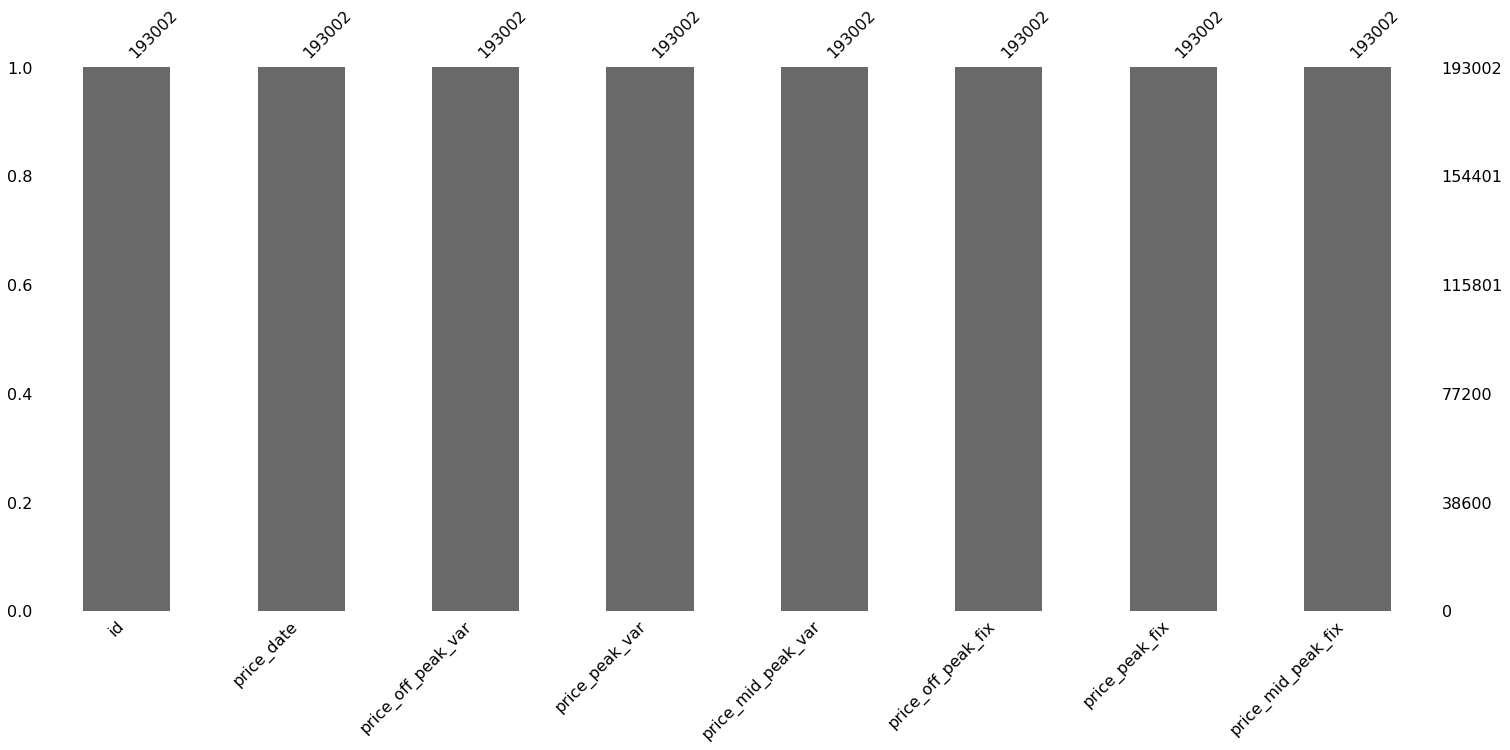

In [74]:
# Visualize the completeness of the dataframe
msno.bar(pco_hist)

To the untrained eye, it might seem that there's no data missing. We can notice that the value counts at the top of each columns display a same amount.

In [75]:
# Identify the index of the IDs containing missing values.
hist_NAN_index = pco_hist[pco_hist.isnull().any(axis=1)].index.values.tolist()

# Obtain a dataframe with the missing values
pco_hist_missing = pco_hist.iloc[hist_NAN_index,:]

# Glimpse at the NaN cases of the pco_hist dataset
pco_hist_missing.head(10)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix


In [76]:
pco_hist.shape

(193002, 8)

We can see the pco_hist has no data. As there are no missing Values

---
###**Facts**

* There are no missing values in the dataset.

### **Imputations**

Imputing time-series data requires a specialized treatment. Time-series data usually comes with special characteristics such trend, seasonality and cyclicality of which we can exploit when imputing missing values in the data.

In this particular dataset, there's not such thing as seasonality because it only has monthly data for one year.

#### **Filling Time Series Data**

In [77]:
# Make a copy of pco_hist dataset
pco_hist_ff = pco_hist.copy(deep=True)

# Print prior to imputing missing values
print(pco_hist_ff.iloc[hist_NAN_index,3:9].head())

# Fill NaNs using forward fill
pco_hist_ff.fillna(method = 'ffill', inplace=True)

print(pco_hist_ff.iloc[hist_NAN_index,3:9].head())


Empty DataFrame
Columns: [price_peak_var, price_mid_peak_var, price_off_peak_fix, price_peak_fix, price_mid_peak_fix]
Index: []
Empty DataFrame
Columns: [price_peak_var, price_mid_peak_var, price_off_peak_fix, price_peak_fix, price_mid_peak_fix]
Index: []


In [78]:
pco_hist_ff.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


In [79]:
# Merge output dataset with historical forward fill dataset
pco_hist_ff_merged = pco_hist_ff.merge(right=pco_output,on=['id'])
pco_hist_ff_merged.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,churn
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0,Stayed
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0,Stayed
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0,Stayed
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0,Stayed
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0,Stayed


## **The Main Dataset**

### **Visualizing the amount of missingness**

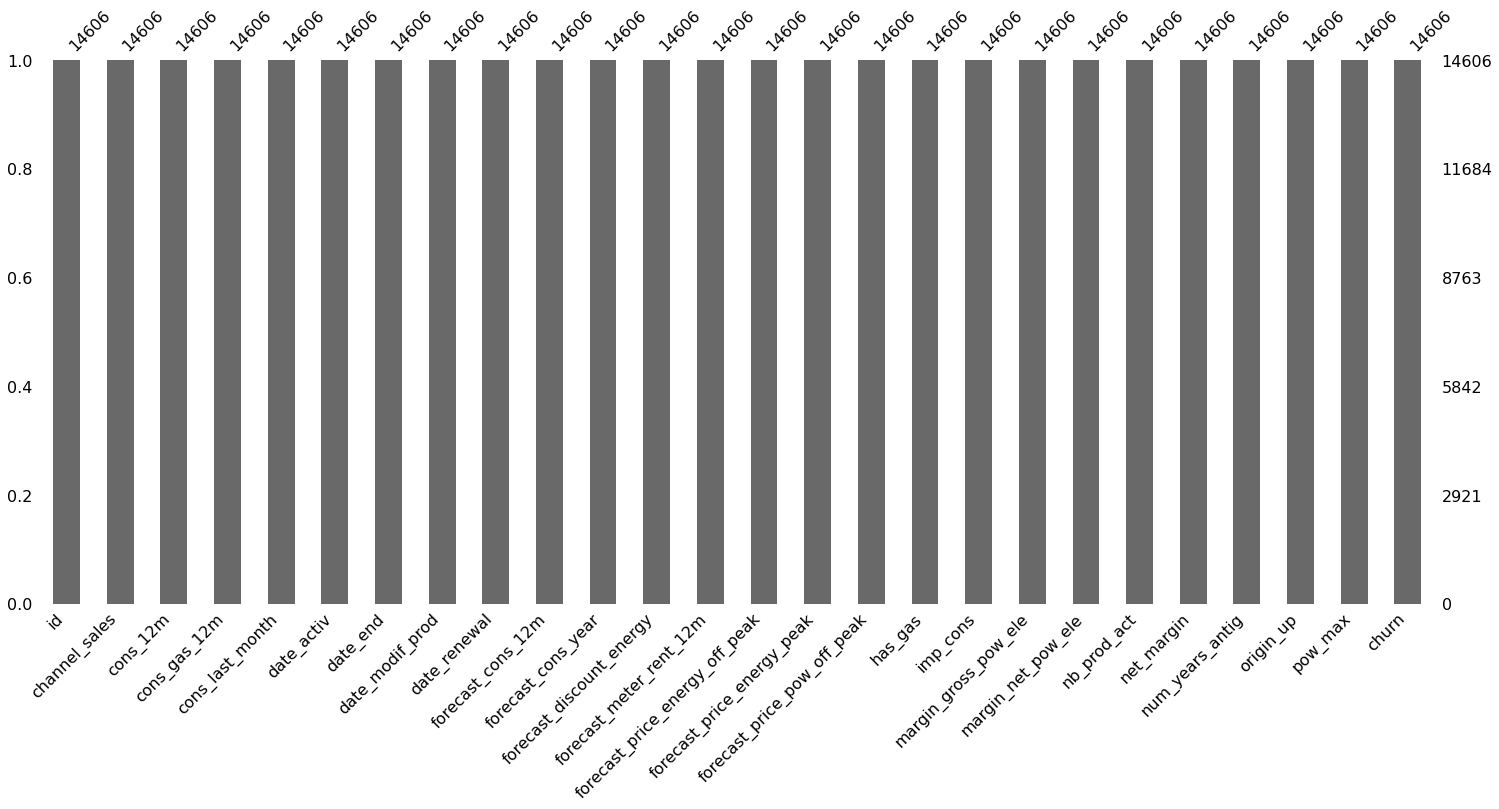

In [80]:
# Visualize the completeness of the dataframe
msno.bar(pco_main)

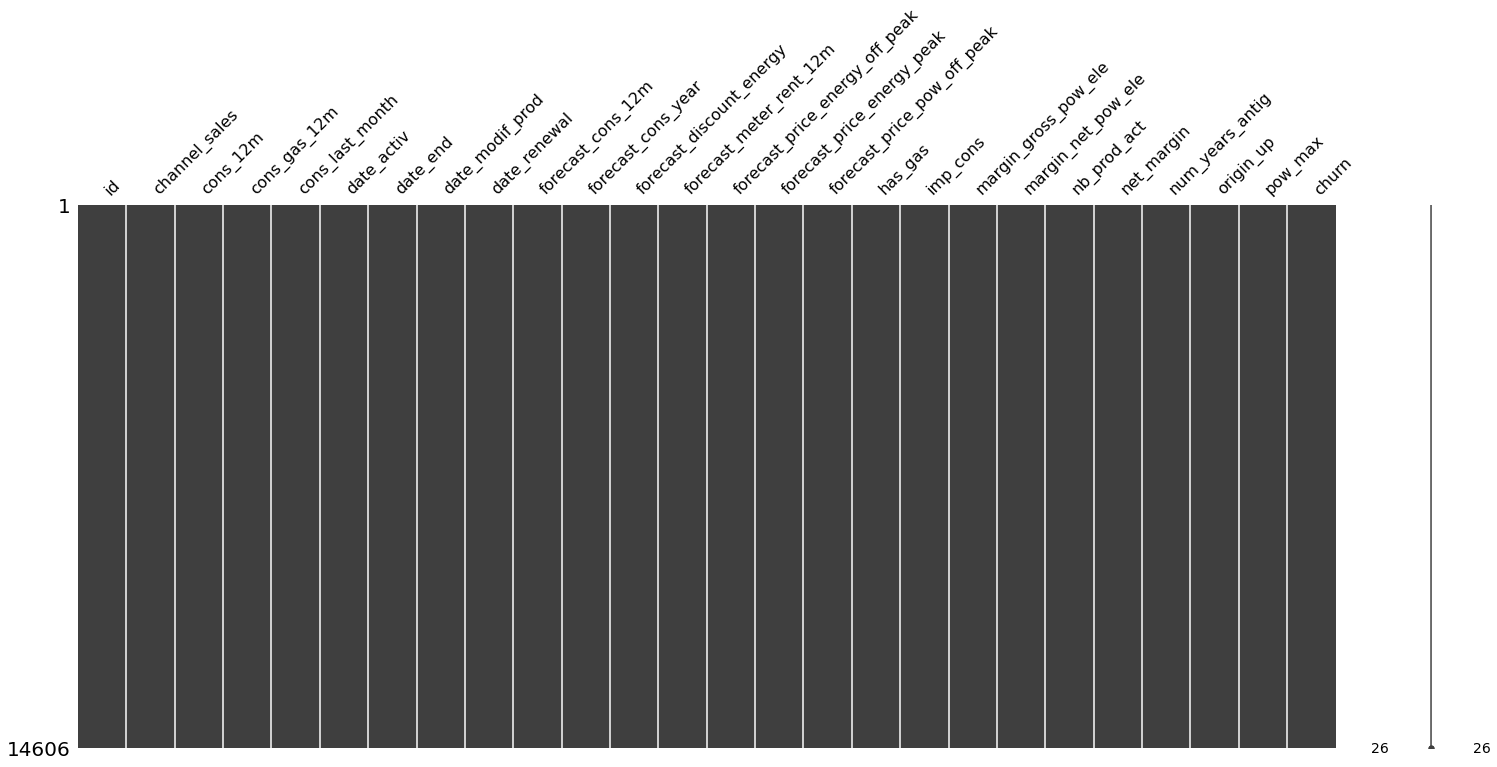

In [81]:
# Visualize the locations of the missing values of the dataset
msno.matrix(pco_main)

/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:305: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:305: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


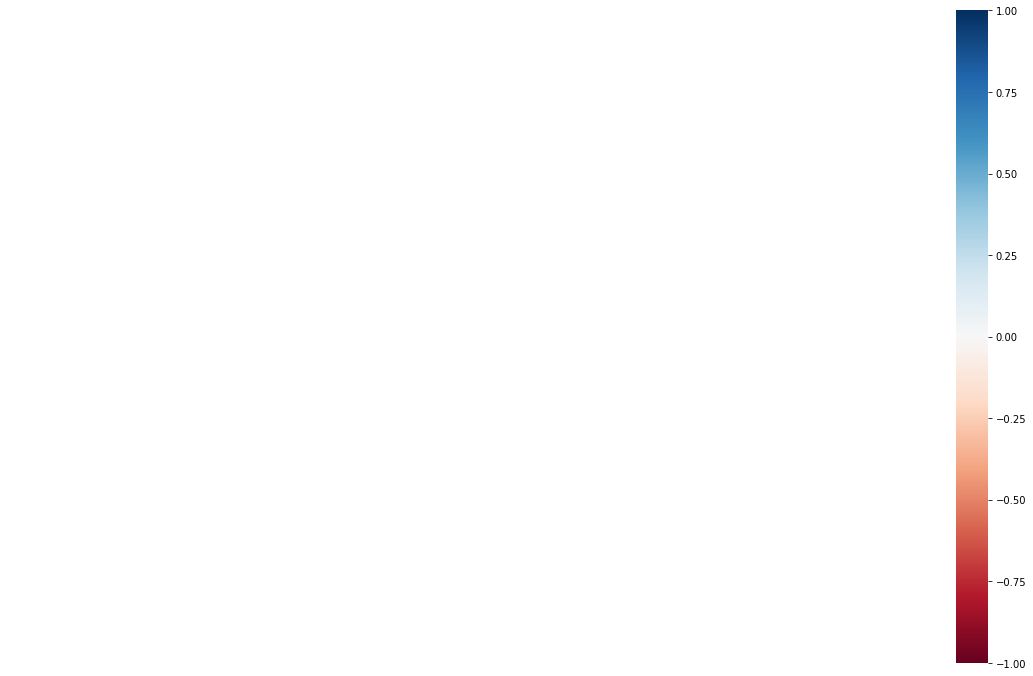

In [82]:
msno.heatmap(pco_main)

In [83]:
# Convert the has_gas column to  Yes/No
pco_main['has_gas'] = pco_main['has_gas'].replace({'t':'Yes','f':'No'})

# Merge the main dataset with the output dataset
pco_main_merged = pco_main.merge(right=pco_output,on=['id'])

pco_main_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14606 entries, 0 to 14605
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [84]:
pco_main_merged.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn_x,churn_y
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,Yes,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,Churned
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,No,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0,Stayed
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,No,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0,Stayed
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,No,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0,Stayed
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,No,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0,Stayed


In [85]:
# Obtain all the variables except for id
variables = [column_name for column_name in pco_main_merged.columns if column_name != 'id']

# Obtain all the categorical variables except for id
categorical = [column_name for column_name in variables if pco_main_merged[column_name].dtype == 'object']

# Obtain all the Date Variables
dates = [column_name for column_name in variables if pco_main_merged[column_name].dtype == 'datetime64[ns]']

# Obtain all the numeric columns
numeric = [column_name for column_name in variables
           if column_name not in categorical 
           and column_name != 'id'
           and column_name != 'churn'
           and column_name not in dates]


# **Data Visualization**

Let's visualize what we've found.

## **The Output Dataset**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


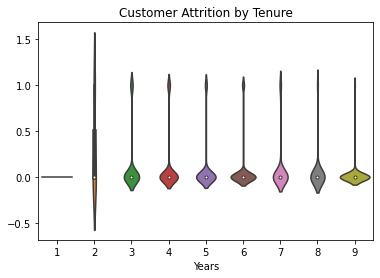

In [88]:
# Calculate the zcores of tenure
tenure_zcores = zscore(a=pco_main_merged['num_years_antig'])
# Convert to absolute values
abs_tenure_zscores = np.abs(tenure_zcores)
# Extract Columns of interest
churn_tenure = pco_main_merged[['churn_x','num_years_antig']]
# Add z-score column
churn_tenure['z_score'] = list(abs_tenure_zscores)
# Remove outliers 
churned_tenure_filtered = churn_tenure[churn_tenure['z_score'] < 3]
# Visualize tenure by retained customer and churner
vio = sns.violinplot( y=churned_tenure_filtered["churn_x"], x=churned_tenure_filtered["num_years_antig"] )
# Settings
vio.set(xlabel='Years', ylabel='')
vio.set_title("Customer Attrition by Tenure")
plt.show()

###**Facts**
* The median age of churners is 4 years
* Customers are more likely to churn during the 4th year than the 7th year
* The median age of retained customers is 5 years


##**The Main Dataset**

In [93]:
# Most popular electricty campaign
ele_nm = pco_main_merged.loc[(pco_main_merged['churn_y']>='Stayed') & (pco_main_merged['net_margin']>0),['id', 'origin_up','net_margin']]

ele_nm.value_counts(subset=['origin_up'])

origin_up                       
lxidpiddsbxsbosboudacockeimpuepw    6155
kamkkxfxxuwbdslkwifmmcsiusiuosws    4002
ldkssxwpmemidmecebumciepifcamkci    2801
MISSING                               58
usapbepcfoloekilkwsdiboslwaxobdp       2
ewxeelcelemmiwuafmddpobolfuxioce       1
dtype: int64

In [94]:
# Highest netting electricity subscription campaign
print(ele_nm.groupby('origin_up')['net_margin'].agg('sum').sort_values(ascending=False))

origin_up
lxidpiddsbxsbosboudacockeimpuepw    1230753.01
kamkkxfxxuwbdslkwifmmcsiusiuosws     627964.96
ldkssxwpmemidmecebumciepifcamkci     564951.43
MISSING                               16386.00
usapbepcfoloekilkwsdiboslwaxobdp        250.40
ewxeelcelemmiwuafmddpobolfuxioce         46.22
Name: net_margin, dtype: float64


### **Facts**
* The most popular electricity campaign is `lxidpiddsbxsbosboudacockeimpuepw` which has brought 6,155 current customers.
* The electricity campaign attributable to the highest total net margin is `lxidpiddsbxsbosboudacockeimpuepw`. Netting $1230753.01.

## **Caveats**


In [97]:
# Select current customers with positive net margins
top_customers = pco_main_merged.loc[(pco_main_merged['churn_y']>='Stayed') & (pco_main_merged['net_margin']>0),['id','num_years_antig','net_margin']]

# Top 10 customers by net margin
top_customers.sort_values(by=['net_margin'],ascending=False).head(10)

,id,num_years_antig,net_margin
10718,d00e8a9951b5551d8f02e45f9ed2b0dd,3,10203.50
12348,818b8bca0a9d7668252d46b978169325,4,4346.37
7794,a3a739686fbd5ba8b4a21ec835507b6d,4,4305.79
12624,ee98a86efa759681cc59c7d4e0d0312f,4,3407.65
4876,9590c7a6100ae76ec078aa177ffb8d0d,3,3215.03
3478,e7bdc7743d73a9bf94cc3c6a293fca93,4,2711.19
4958,9a0411074f84ea385f555943f27a2d81,3,2653.59
7236,41b7c011f9d87044bb2e297264e95080,6,2625.38
10685,e5636f7ada7a80747af18b285632767e,10,2467.98
9345,078b4e5f8ea9a2f5f4c667f2d2236791,4,2340.78


These are the most profitable customers for PowerCo in terms of net margin. Beware most of them are within the likely tenure of attrition. Time for a marketing campaign!